## Final Assignment


Before working on this assignment please read the instructions fully. Use blackboard to submit a link to your repository. Upload a rendered document (html/pdf) as well as the original code. Please familiarize yourself with the criteria before beginning the assignment.

You should define a research question yourself based on at least two data sources that can be merged into a tidy dataset. The research question should be life science related. The research question should be a question with a causual nature. For instance questions like: How do independent variables X influence the dependent variable of Y? The research question should be answered with an interactive visual, and if possible tested for significance.
If you use code snippets from others you should refer to the original author, otherwise you will be accused of plagiarism. Please be prepared to explain your code in a verbal exam. 



Assessment criteria

Conditional
- No data and or api-key information is stored in the repository. 
- No hard datapaths are used, datapaths are provided in a configfile.
- At least two data sets are merged into one tidy dataframe.

Graded
- (5 pt) The research question is stated. 
- (5 pt) Links to sources are provided and a small description about the data
- (20 pt) Data qualitity and data quantity are inspected and reported. Appropiate transformations are applied.
- (20 pt) Assumptions and presuppositions are made explicit (chosen data storage method, chosen analysis method, chosen design). An argumentative approach is used explaining steps, taken into account data quality and quantity. Explanation is provided either with comments in the code or in a seperate document.
- (10 pt) Interactive visualization is extracted from correct analysis of (incomplete) data
- (10 pt) The design supports the research question. The data is informative in relation to the topic. Visualization is functional and attractive Figures contain X and Y labels, title and captions. (10)
- (20 pt) Code is efficient coded, according to coding style without code smells and easy to read. Code is demonstrated robust and flexible 
- (10 pt) All the code is stored in repository with Readme including most relevant information to implement the code. used software is suitably licensed and documented


### About the data

You can either choose 
- a dataset combination provided on blackboard
- two datasets on the web from two different sources which can be used to answer a research question
- the data from your project

You are welcome to choose datasets at your discretion, but keep in mind they will be shared with others, so choose appropriate datasets. You are welcome to use datasets of your own as well, but minimual two datasets should be coming from the web and or API's. 

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations in your visualization. 

### Instructions:

Define a research question, select data and code your data acquisition, data processing, data analysis and visualization. Use a repository with a commit strategy and write a readme file. Make sure that you document your choices. 

How do BMI influence the Glucose level?

In [ ]:
#The question is raised:

#My question is whether there is a relationship between the protein levels and the fat levels of foods consumed by covid patients
#around the world on the rate of active, recovered or dead covid patients? 

In [ ]:
#link of datasets:
#https://www.kaggle.com/datasets/mariaren/covid19-healthy-diet-dataset?select=Fat_Supply_Quantity_Data.csv

#Description of datasets:
#I have two datasets containing percentages of protein and fat intake by COVID patients around the world. I select those columns
#that have the greatest impact on consumption protein and fat.


In [1]:

import pandas as pd
import numpy as np
import yaml
from bokeh.io import output_notebook
output_notebook() 
import seaborn as sns
import matplotlib.pyplot as plt

Loading BokehJS ...

## Part 1: Load the data

In [3]:
# load config file
def get_config():
    with open('config5.yaml','r') as strem:
        config5 =yaml.safe_load(strem)
    return config5


config5 = get_config()
fat = config5['fat']
protein = config5['protein']

# read csv data 
df_fat = pd.read_csv(fat)
df_protein = pd.read_csv(protein)

df_fat.head(5)
df_protein.head(5)


df_fat.info()
df_protein.info()


,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Miscellaneous,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,9.7523,0.0277,0.0,35.9771,0.4067,0.0647,0.5824,3.1337,...,1.1370,0.0462,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.1840,27.7469,0.0711,0.0,14.2331,1.8069,0.6274,1.2757,7.6582,...,3.2456,0.0544,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0323,13.8360,0.0054,0.0,26.5633,1.2916,0.6350,1.1624,3.5088,...,3.1267,0.1399,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,0.6285,15.2311,0.0277,0.0,20.3882,0.1756,5.4436,1.2754,7.6248,...,0.8133,0.0924,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,0.1535,33.1901,0.1289,0.0,10.5108,0.4850,8.2146,1.2586,16.0670,...,1.6024,0.2947,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


## Part 2: inspection the data

In [4]:
# missing data analyses


# calculate percentage of missing value in fat dataset
df_fat.isnull().mean()*100
df_fat[df_fat.isnull().any(axis=1)]


# calculate percentage of miss value in protein dataset
df_protein.isnull().mean()*100
df_protein[df_protein.isnull().any(axis=1)]


#The 16 rows in both datasets have missing data, and we do not have any experts to fill in NA, so I decided to drop them with thresh 
#value 30
df_fat_na=df_fat.dropna(axis=0,thresh=30)
df_protein_na=df_protein.dropna(axis=0,thresh=30)



#rename column
df_fat_na=df_fat_na.rename(columns={'Animal Products':'Animal Products_f',
                                    'Animal fats':'Animal fats_f',
                                    'Sugar & Sweeteners':'Sugar & Sweeteners_f',
                                    'Vegetal Products':'Vegetal Products_f',
                                    'Vegetable Oils':'Vegetable Oils_f',
                                    'Deaths':'Deaths_f',
                                    'Recovered':'Recovered_f',
                                    'Active':'Active_f',
                                    'Population':'Population_f'})
#Column selection un fat dataset
df_fat_na=df_fat_na.loc[:,['Animal Products_f',
                    'Animal fats_f',
                    'Sugar & Sweeteners_f',
                    'Vegetal Products_f',
                    'Vegetable Oils_f',
                    'Deaths_f',
                    'Recovered_f',
                    'Active_f',
                    'Population_f',
                    'Country']]

#Column selection in protein dataset
df_protein_na = df_protein_na.loc[:,['Animal Products',
                              'Animal fats',
                              'Sugar & Sweeteners',
                              'Vegetal Products',
                              'Vegetable Oils',
                              'Deaths',
                              'Recovered',
                              'Active',
                              'Population',
                              'Country']]  


                                    
#Datasets final check
print(list(df_protein_na.columns))
print(list(df_fat_na.columns))
df_protein_na.shape
df_fat_na.shape


['Animal Products', 'Animal fats', 'Sugar & Sweeteners', 'Vegetal Products', 'Vegetable Oils', 'Deaths', 'Recovered', 'Active', 'Population', 'Country']
['Animal Products_f', 'Animal fats_f', 'Sugar & Sweeteners_f', 'Vegetal Products_f', 'Vegetable Oils_f', 'Deaths_f', 'Recovered_f', 'Active_f', 'Population_f', 'Country']
(164, 19) (164, 19)


## Part 3: The data wrangling 

In [5]:

#merging protein dataset with fat dataset
df_patient = pd.merge(df_protein_na,df_fat_na,on='Country')
df_patient.head(5)
df_patient.shape


#dropping dublicats data
df_patient_dub= df_patient.drop_duplicates()
print(df_patient.shape,df_patient_dub.shape)

#check correlation between columns
print(df_patient['Animal Products_f'].corr(df_patient['Recovered_f']))
print(df_patient['Animal fats_f'].corr(df_patient['Recovered_f']))
print(df_patient['Sugar & Sweeteners_f'].corr(df_patient['Recovered_f']))
print(df_patient['Vegetal Products_f'].corr(df_patient['Recovered_f']))
print(df_patient['Vegetable Oils_f'].corr(df_patient['Recovered_f']))
print(df_patient['Animal Products'].corr(df_patient['Recovered']))
print(df_patient['Sugar & Sweeteners'].corr(df_patient['Recovered']))
print(df_patient['Vegetal Products'].corr(df_patient['Recovered']))
print(df_patient['Vegetable Oils'].corr(df_patient['Recovered']))
print(df_patient['Animal fats'].corr(df_patient['Recovered']))
print(df_patient['Animal Products_f'].corr(df_patient['Deaths_f']))
print(df_patient['Animal fats_f'].corr(df_patient['Deaths_f']))
print(df_patient['Sugar & Sweeteners_f'].corr(df_patient['Deaths_f']))
print(df_patient['Vegetal Products_f'].corr(df_patient['Deaths_f']))
print(df_patient['Vegetable Oils_f'].corr(df_patient['Deaths_f']))

0.40383167802724634
0.45610069803188963
-0.057534128168642375
-0.4038696145740695
-0.1571857019912298
0.40331983021807294
0.11918280689384746
-0.4033131326799874
0.18890683070395398
0.3597050759278262
0.4415137642242007
0.5193210566673092
-0.0697472012682272
-0.4415539985979649
-0.1052658296080774


## Part 4: Data visualization

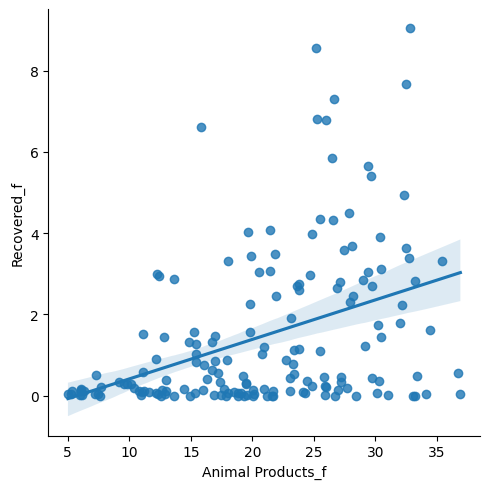

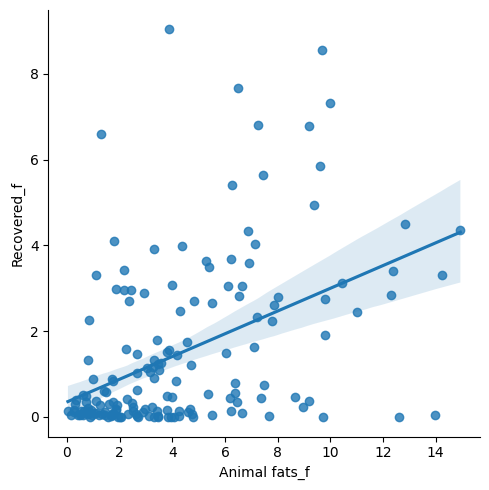

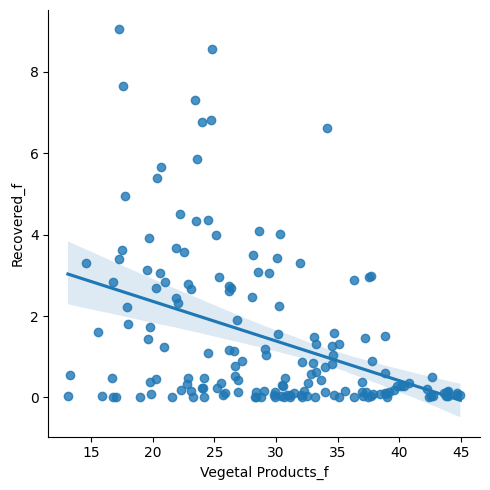

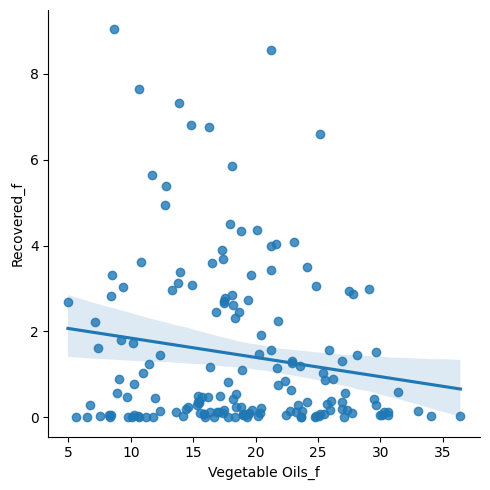

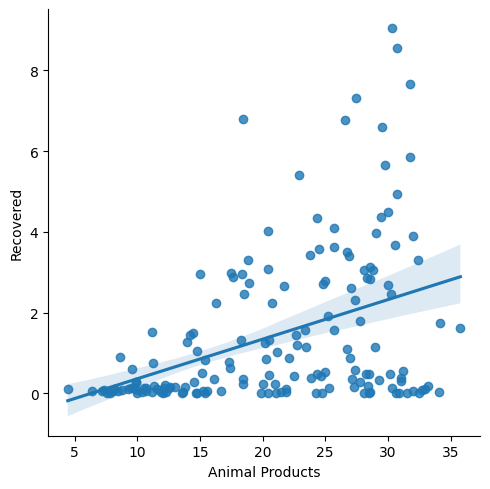

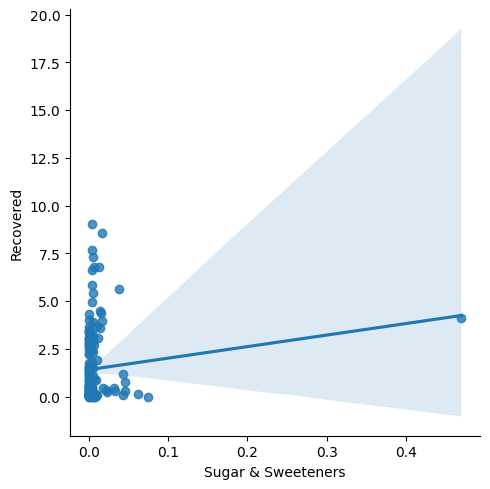

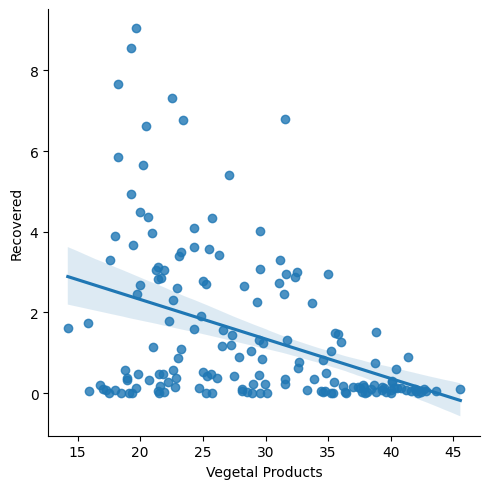

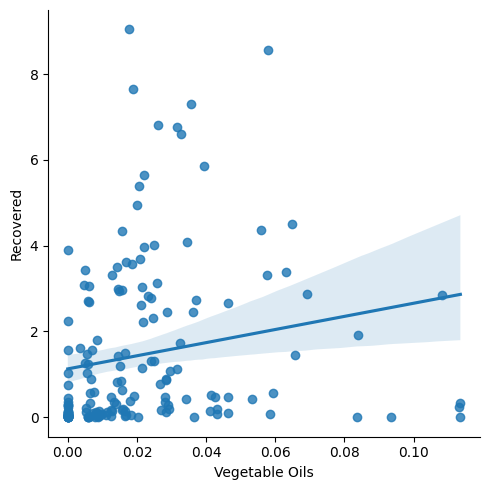

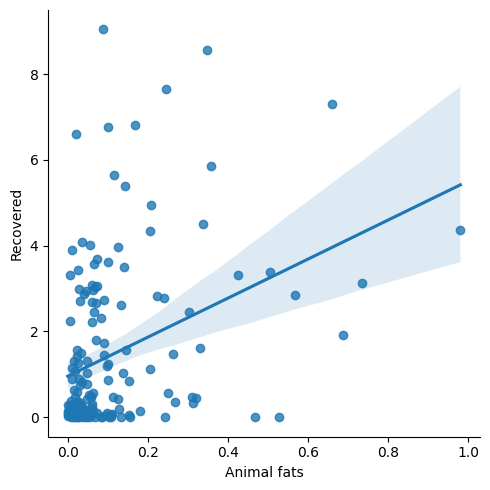

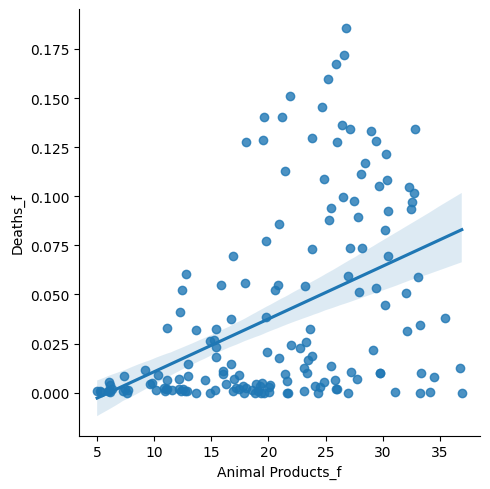

In [6]:
sns.lmplot(x="Animal Products_f", y="Recovered_f" ,data= df_patient)
sns.lmplot(x="Animal fats_f", y="Recovered_f" ,data= df_patient)
sns.lmplot(x="Vegetal Products_f", y="Recovered_f" ,data= df_patient)
sns.lmplot(x="Vegetable Oils_f", y="Recovered_f" ,data= df_patient)
sns.lmplot(x="Animal Products", y="Recovered" ,data= df_patient)
sns.lmplot(x="Sugar & Sweeteners", y="Recovered" ,data= df_patient)
sns.lmplot(x="Vegetal Products", y="Recovered" ,data= df_patient)
sns.lmplot(x="Vegetable Oils", y="Recovered" ,data= df_patient)
sns.lmplot(x="Animal fats", y="Recovered" ,data= df_patient)
sns.lmplot(x="Animal Products_f", y="Deaths_f" ,data= df_patient)

C:\Users\Asus\AppData\Local\Temp\ipykernel_14424\3311187779.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_patient.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.5, ax=ax)


Text(0.5, 1.0, 'Correlation Heatmap')

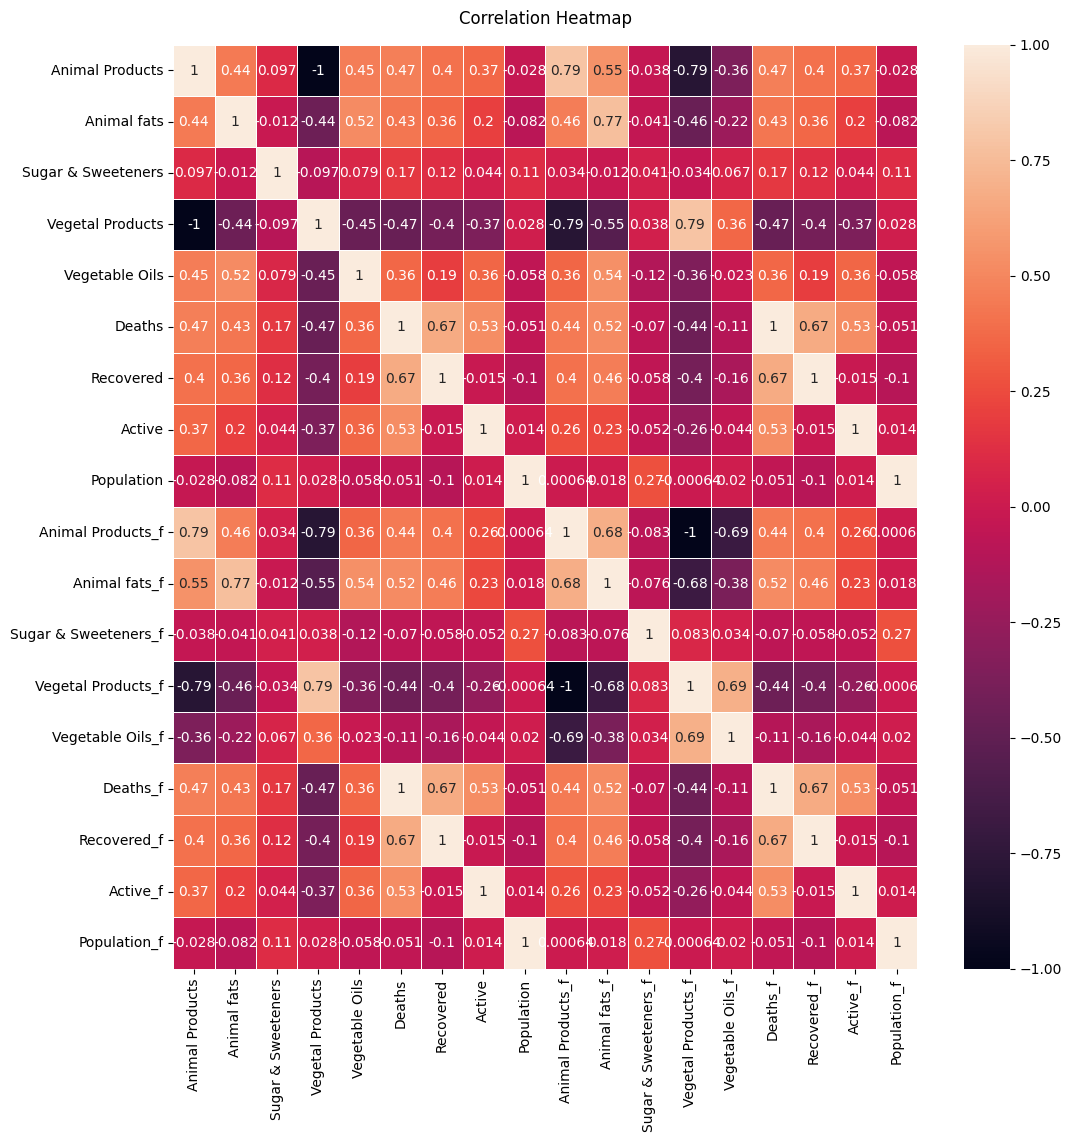

In [15]:
#heatmaping between columns
fig, ax = plt.subplots(figsize=(12,12)) 
heatmap = sns.heatmap(df_patient.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.5, ax=ax)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=15)